In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt
import scipy.optimize

In [2]:
from energy_state_space import EnergyConstCurvaturesStateSpace
from energy_state_space import PointsParametrizationEnergyStateSpace
from energy_state_space.utils.math import cvt_local2global, cvt_global2local, wrap_angle

# Random curvature state space

In [3]:
point_count = 100
rs = np.random.rand(point_count - 1) * 10 - 5
state_space = EnergyConstCurvaturesStateSpace(rs, 0.1, 1, 1)

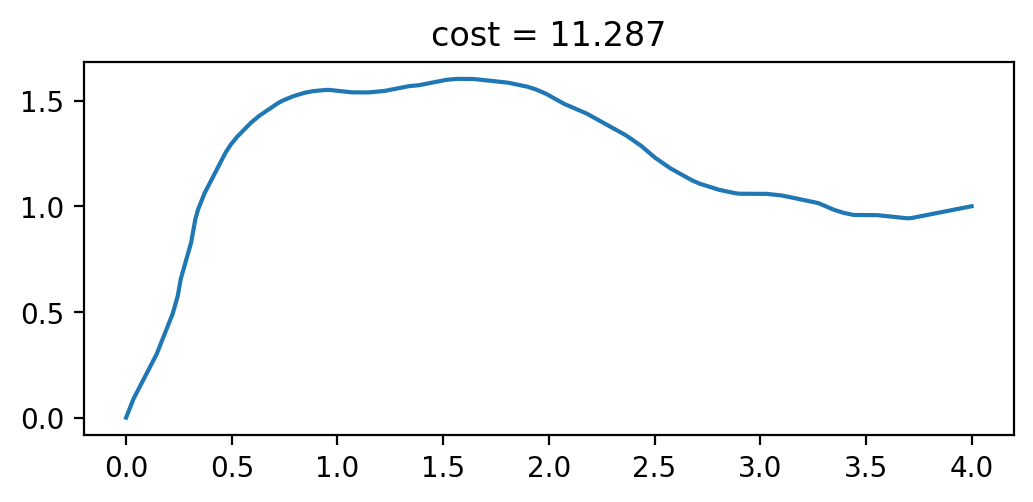

In [4]:
start_point = np.array([0, 0, 0])
finish_point = np.array([4, 1, 0])
trajectory = state_space.trajectory(start_point, finish_point)
plt.figure(dpi=200)
plt.plot(trajectory[:, 0], trajectory[:, 1])
plt.gca().set_aspect('equal')
plt.title("cost = {:.3f}".format(state_space.distance(start_point, finish_point)));

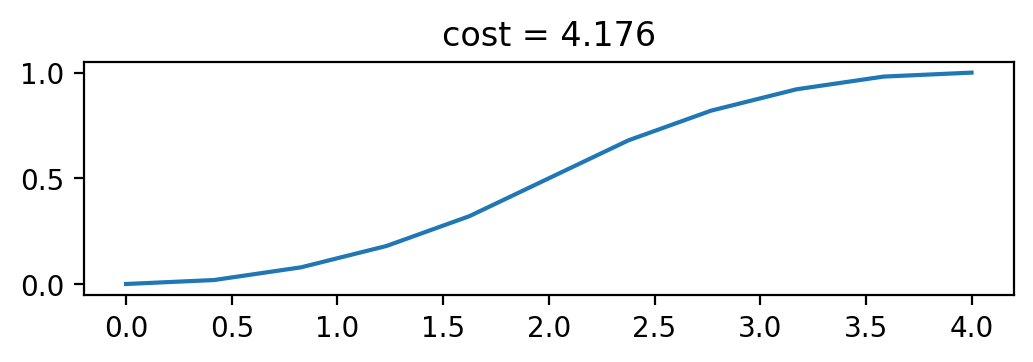

In [5]:
r = 0.01
initial_x = np.ones(10) * r
initial_x[5:] = - r
state_space.set_radiuses(initial_x)
trajectory = state_space.trajectory(start_point, finish_point)
plt.figure(dpi=200)
plt.plot(trajectory[:, 0], trajectory[:, 1])
plt.gca().set_aspect('equal')
plt.title("cost = {:.3f}".format(state_space.distance(start_point, finish_point)));

## Scipy optimization state space

In [6]:
point_count = 5
rs = np.random.rand(point_count - 1) * 10 - 5
# rs = np.ones(10) * 1
# r = 0.01
# initial_x = np.ones(20) * r
# initial_x[10:] = - r
initial_x = rs
state_space = EnergyConstCurvaturesStateSpace(initial_x, 0.1, 0.1 * 0.416 / 2, 0.416 / 2.)
start_point = np.array([0, 0, 0])
finish_point = np.array([1, 1, 0])

In [7]:
def const_function(x, state_space, start_point, finish_point):
    state_space.set_radiuses(x)
    return state_space.distance(start_point, finish_point)

In [8]:
scipy.optimize.minimize(const_function, initial_x, args=(state_space, start_point, finish_point))

      fun: 1.734531477127408
 hess_inv: array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])
      jac: array([ 1.63051039e-02,  1.06588006e-04, -5.50001860e-05, -6.49183989e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 673
      nit: 0
     njev: 111
   status: 2
  success: False
        x: array([ 0.43860181,  2.96907132, -4.61248548,  2.24924164])

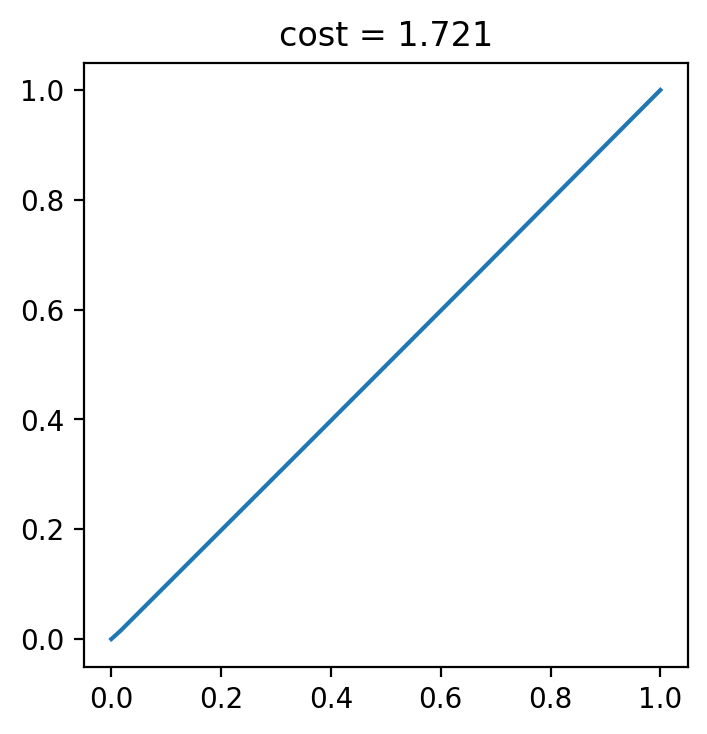

In [9]:
trajectory = state_space.trajectory(start_point, finish_point)
plt.figure(dpi=200)
plt.plot(trajectory[:, 0], trajectory[:, 1])
plt.gca().set_aspect('equal')
plt.title("cost = {:.3f}".format(state_space.distance(start_point, finish_point)));

# Points parametrization

In [10]:
np.random.seed(100)
random_points = np.random.rand(10, 2) * 5
state_space = PointsParametrizationEnergyStateSpace(random_points, 0, 0.208)

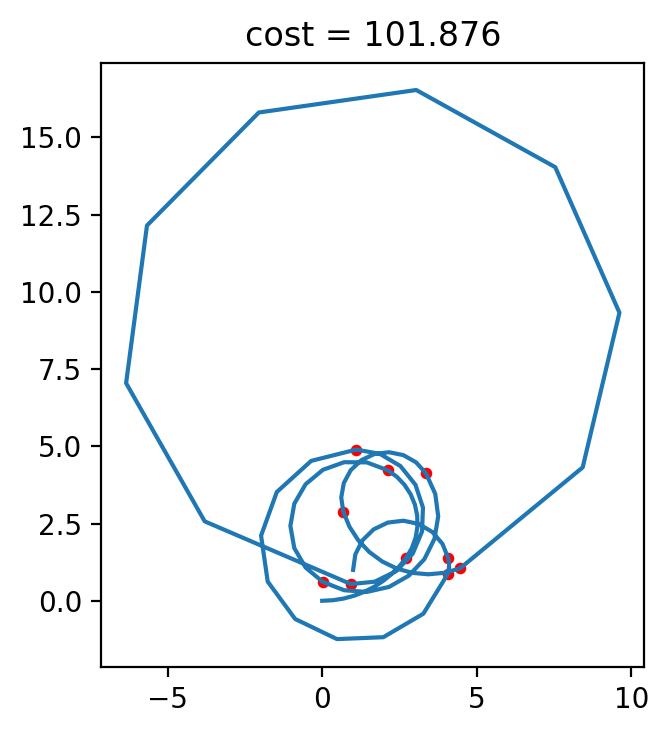

In [11]:
start_point = np.array([0., 0, 0])
finish_point = np.array([1., 1, 0])
trajectory = state_space.trajectory(start_point, finish_point)
plt.figure(dpi=200)
plt.plot(trajectory[:, 0], trajectory[:, 1])
plt.scatter(random_points[:, 0], random_points[:, 1], s=10, c="r")
plt.gca().set_aspect('equal')
plt.title("cost = {:.3f}".format(state_space.distance(start_point, finish_point)));

## Scipy Optimize state space

In [12]:
initial_x = np.concatenate((np.array([0]), np.random.rand(4)))
state_space = PointsParametrizationEnergyStateSpace(initial_x[1:].reshape(-1, 2), initial_x[0], 0.416 / 2.)
start_point = np.array([0, 0, 0])
finish_point = np.array([1, 1, 0])

In [13]:
def cost_function(x, state_space, start_point, finish_point):
    state_space.set_parametrization(x)
    return state_space.distance(start_point, finish_point)
scipy.optimize.minimize(cost_function, initial_x, args=(state_space, start_point, finish_point))

      fun: 1.6205754632445208
 hess_inv: array([[ 0.05576888, -0.03969925,  0.00583382, -0.04787772,  0.00465687],
       [-0.03969925,  0.20987588, -0.02311449,  0.26920793, -0.03694207],
       [ 0.00583382, -0.02311449,  0.00343927, -0.02955906,  0.00402672],
       [-0.04787772,  0.26920793, -0.02955906,  0.35796841, -0.06350623],
       [ 0.00465687, -0.03694207,  0.00402672, -0.06350623,  0.04302961]])
      jac: array([-0.36856076,  0.66411498, -0.18762816, -0.44200934, -0.02588962])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 621
      nit: 31
     njev: 88
   status: 2
  success: False
        x: array([-0.11525114,  0.52113237,  0.35019186,  0.5422175 ,  0.52547552])

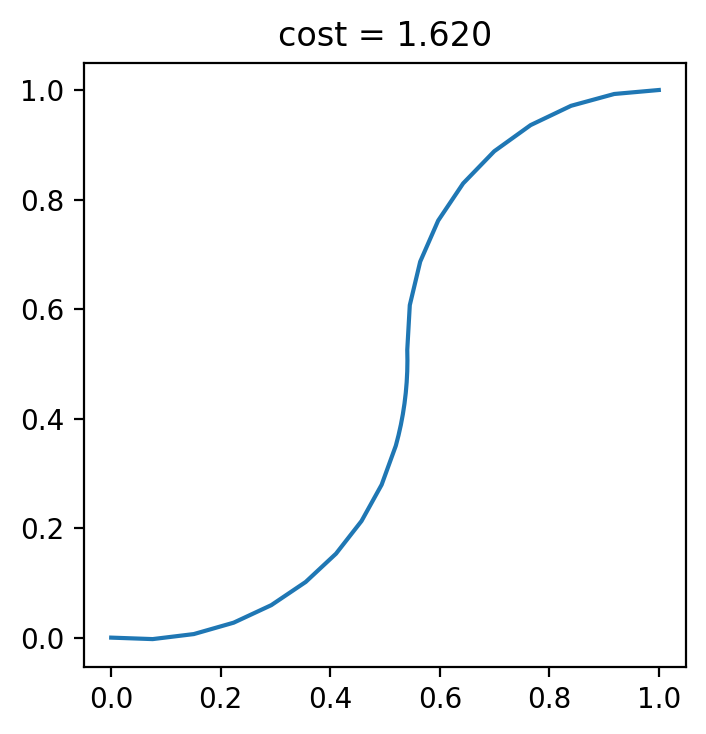

In [14]:
trajectory = state_space.trajectory(start_point, finish_point)
plt.figure(dpi=200)
plt.plot(trajectory[:, 0], trajectory[:, 1])
plt.gca().set_aspect('equal')
plt.title("cost = {:.3f}".format(state_space.distance(start_point, finish_point)));

# Torch optimization

In [15]:
from energy_state_space import PointsParametrizationEnergyOptimizer

In [26]:
t = np.linspace(0.1, np.pi / 2 - 0.1, 10)
x = np.sin(t)
y = 1 - np.cos(t)
x = np.random.rand(4)
y = np.random.rand(4)
initial_x = np.concatenate((np.array([0]), np.array([x, y]).T.reshape(-1)))
state_space = PointsParametrizationEnergyStateSpace(initial_x[1:].reshape(-1, 2), initial_x[0], 0.416 / 2.)
start_point = np.array([0., 0, 0])
finish_point = np.array([1., 1, 0])

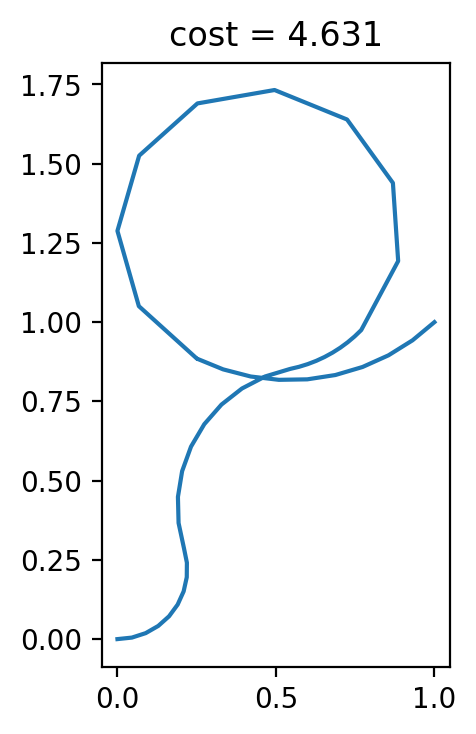

In [27]:
trajectory = state_space.trajectory(start_point, finish_point)
plt.figure(dpi=200)
plt.plot(trajectory[:, 0], trajectory[:, 1])
plt.gca().set_aspect('equal')
plt.title("cost = {:.3f}".format(state_space.distance(start_point, finish_point)));

In [28]:
optimizer = PointsParametrizationEnergyOptimizer(state_space)

In [29]:
optimizer.optimize(start_point, finish_point, initial_x[1:].reshape(-1, 2), initial_x[0], 20)

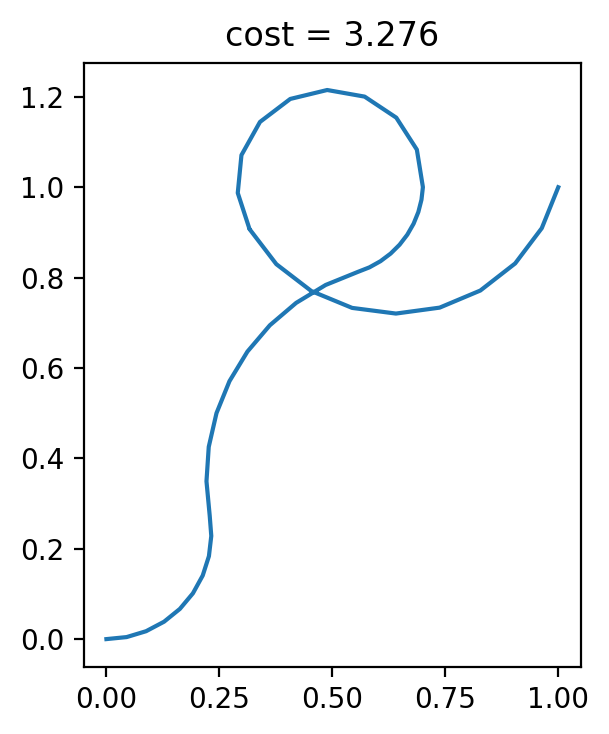

In [30]:
trajectory = state_space.trajectory(start_point, finish_point)
plt.figure(dpi=200)
plt.plot(trajectory[:, 0], trajectory[:, 1])
plt.gca().set_aspect('equal')
plt.title("cost = {:.3f}".format(state_space.distance(start_point, finish_point)));